In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.15, random_state=1)

<function matplotlib.pyplot.show(close=None, block=None)>

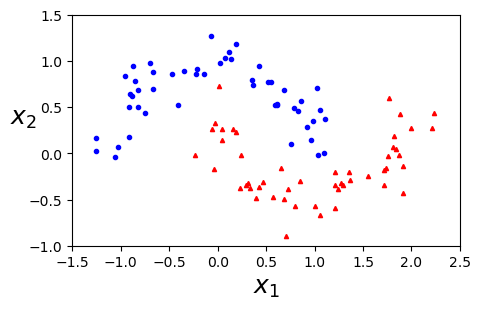

In [3]:
plt.figure(figsize=(5,3))
plt.plot(x[y==0, 0], x[y==0, 1], 'bo', markersize=3)
plt.plot(x[y==1, 0], x[y==1, 1], 'r^', markersize=3)

plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18, rotation=0)
plt.axis([-1.5,2.5,-1,1.5])

plt.show

In [6]:
#使用LinearSVC()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polySvmClf = Pipeline([
    ('polyFeatures', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('svmClf', LinearSVC(dual='auto',max_iter=10000, C=10, loss='hinge',random_state=1))
])     #由於版本更新,在參數加上dual='auto',可避免錯誤

polySvmClf.fit(x, y)
polySvmClf['svmClf'].intercept_, polySvmClf['svmClf'].coef_

(array([-0.03153186]),
 array([[-2.25249606, -2.09821249, -3.60711099,  0.06669574,  0.24982146,
          6.2377727 , -0.96763359,  2.00076335, -0.93935332]]))

In [9]:
polySvmClf['polyFeatures'].get_feature_names_out(['x1','x2'])    #將get_feature_names改成get_featue_names_out

array(['x1', 'x2', 'x1^2', 'x1 x2', 'x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2',
       'x2^3'], dtype=object)

In [10]:
polySvmClf.score(x, y)

0.99

In [15]:
def plotPredictions(model, axes=[-1.5, 2.5, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 1000)
    x2s = np.linspace(axes[2], axes[3], 1000)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    
    yPred = model.predict(xNew).reshape(x1.shape)
    plt.contourf(x1, x2, yPred, cmap=plt.cm.brg, alpha=0.2)
    
    yDecision = model.decision_function(xNew).reshape(x1.shape)
    plt.contour(x1, x2, yDecision, colors='k', levels=[-1, 0, 1],linestyles=['--', '-' ,'--'], alpha=0.8)
    
    plt.plot(x[y==0, 0], x[y==0, 1], 'bo', markersize=3, label='$y=0$')
    plt.plot(x[y==1, 0], x[y==1, 1], 'r^', markersize=3, label='$y=1$')
    
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18, rotation=0)

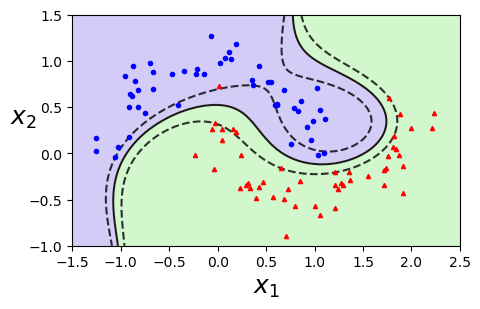

In [16]:
plt.figure(figsize=(5, 3))
plotPredictions(polySvmClf)
plt.show()

In [18]:
#使用SGDClassifier(loss='hinge')

from sklearn.linear_model import SGDClassifier
sgdClf = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scl', StandardScaler()),
    ('sgd', SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, random_state=1))
])

sgdClf.fit(x, y)
sgdClf['sgd'].intercept_, sgdClf['sgd'].coef_

(array([0.44326694]),
 array([[-2.63679028, -2.95315671, -5.40210818, -1.01936287,  0.21208227,
          9.10964191, -0.31194776,  2.33736493, -1.08086096]]))

In [19]:
sgdClf.score(x, y)

0.99

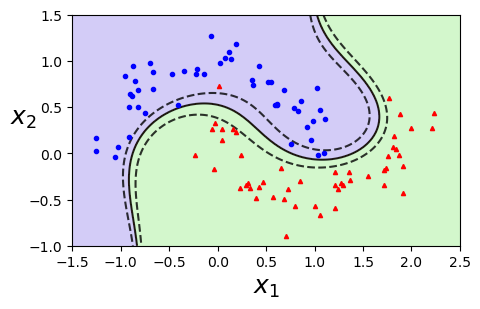

In [20]:
plt.figure(figsize=(5,3))
plotPredictions(sgdClf)
plt.show()

In [22]:
#使用SVC(kernel='poly')

from sklearn.svm import SVC

polyClf = Pipeline([
    ('scl', StandardScaler()),
    ('polySvc', SVC(kernel='poly', degree=3, coef0=1, C=10, random_state=1))
])

polyClf.fit(x, y)

Pipeline(steps=[('scl', StandardScaler()),
                ('polySvc', SVC(C=10, coef0=1, kernel='poly', random_state=1))])

In [23]:
polyClf.score(x, y)

0.99

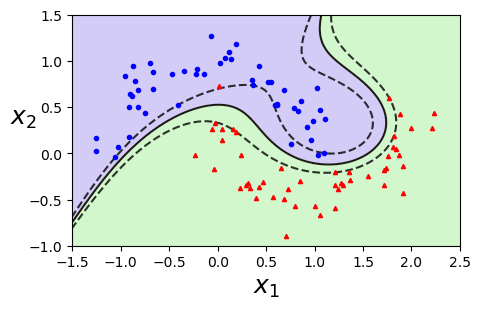

In [24]:
plt.figure(figsize=(5, 3))
plotPredictions(polyClf)
plt.show()

In [25]:
#使用SVC(kernel='rbf')

from sklearn.svm import SVC

rbfClf = Pipeline([
    ('scl', StandardScaler()),
    ('linearSvc', SVC(kernel='rbf', gamma=5, C=10, random_state=1))
])

rbfClf.fit(x, y)

Pipeline(steps=[('scl', StandardScaler()),
                ('linearSvc', SVC(C=10, gamma=5, random_state=1))])

In [26]:
rbfClf.score(x, y)

1.0

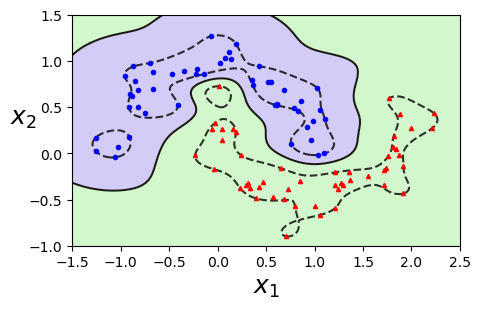

In [28]:
plt.figure(figsize=(5, 3))
plotPredictions(rbfClf)
plt.show()